## Load the Cleansed Dataset

In [2]:
import pandas as pd

# Load the cleansed dataset
df = pd.read_csv("cleaned_obesity_data.csv")

# Display first few rows
df.head()


,BMI,FAVC,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,NObeyesdad
0,24.386526,no,2.0,3.0,Sometimes,2.0,0.0,1.0,no,Normal_Weight
1,24.238227,no,3.0,3.0,Sometimes,3.0,3.0,0.0,Sometimes,Normal_Weight
2,23.765432,no,2.0,3.0,Sometimes,2.0,2.0,1.0,Frequently,Normal_Weight
3,26.851852,no,3.0,3.0,Sometimes,2.0,2.0,0.0,Frequently,Overweight_Level_I
4,28.342381,no,2.0,1.0,Sometimes,2.0,0.0,0.0,Sometimes,Overweight_Level_II


## Import Required Libraries  



In [3]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


## Prepare Data for Clustering




In [4]:
# Remove the target variable (for clustering)
df_clustering = df.drop(columns=["NObeyesdad"])

# Convert categorical variables to numerical (if needed)
df_clustering = pd.get_dummies(df_clustering, drop_first=True)

# Display processed data
df_clustering.head()


,BMI,FCVC,NCP,CH2O,FAF,TUE,FAVC_yes,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no
0,24.386526,2.0,3.0,2.0,0.0,1.0,False,False,True,False,False,False,True
1,24.238227,3.0,3.0,3.0,3.0,0.0,False,False,True,False,False,True,False
2,23.765432,2.0,3.0,2.0,2.0,1.0,False,False,True,False,True,False,False
3,26.851852,3.0,3.0,2.0,2.0,0.0,False,False,True,False,True,False,False
4,28.342381,2.0,1.0,2.0,0.0,0.0,False,False,True,False,False,True,False


## Compute the Elbow Plot  



In [5]:
# Define the range of clusters to test
inertia = []
cluster_range = range(1, 11)  # Testing 1 to 10 clusters

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_clustering)
    inertia.append(kmeans.inertia_)


### Visualisation of the Elbow Method  

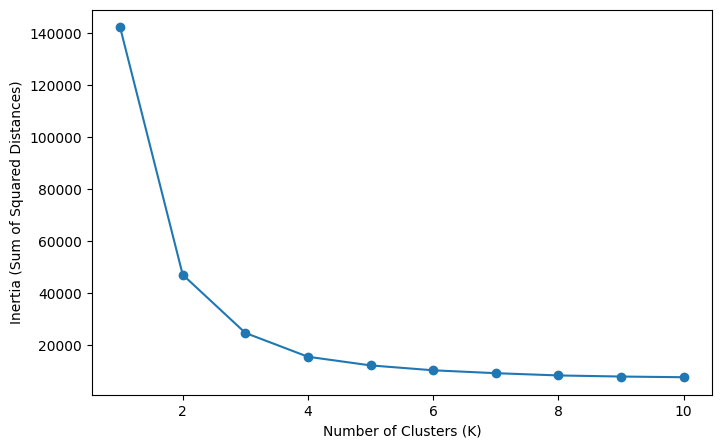

In [30]:
# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.show()


## Silhouette Score

### Install Required Packages



In [31]:
# Install required packages if not already installed
!pip install scikit-learn numpy matplotlib


### Compute Silhouette Scores

In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Dictionary to store silhouette scores
silhouette_scores = {}

# Define cluster range (matching the elbow plot)
cluster_range = range(2, 11)  # Starts from 2 because silhouette score isn't defined for k=1

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_clustering)
    silhouette_scores[k] = silhouette_score(df_clustering, cluster_labels)

# Print silhouette scores
for k, score in silhouette_scores.items():
    print(f"Silhouette Score for k={k}: {score:.4f}")


Silhouette Score for k=2: 0.1844
Silhouette Score for k=3: 0.2437
Silhouette Score for k=4: 0.3000
Silhouette Score for k=5: 0.3270
Silhouette Score for k=6: 0.3544
Silhouette Score for k=7: 0.3610
Silhouette Score for k=8: 0.3184
Silhouette Score for k=9: 0.3098
Silhouette Score for k=10: 0.2970


## Heatmap of Cluster Centroids

### Install required packages

In [18]:
# Install Seaborn if not already installed
!pip install seaborn
# Install required libraries if not installed
!pip install seaborn scikit-learn


### Import Required Libraries  



In [19]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans


### Assign cluster labels





In [27]:
# Define number of clusters (adjust as needed)
num_clusters = 4  

# Apply KMeans clustering to the dataset
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_clustering["KMeans_Cluster"] = kmeans.fit_predict(df_clustering)

# Increment cluster labels by 1 (so they range from 1 to 4)
df_clustering["KMeans_Cluster"] = df_clustering["KMeans_Cluster"] + 1


# Display column names
print(df_clustering.columns)

# Show first few rows of the dataset
print(df_clustering.head())


Index(['BMI', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'FAVC_yes',
       'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'CALC_Frequently',
       'CALC_Sometimes', 'CALC_no', 'KMeans_Cluster'],
      dtype='object')
        BMI      FCVC       NCP  CH2O       FAF       TUE  FAVC_yes  \
0 -0.663421 -0.785019  0.404153   2.0 -1.188039  0.561997 -2.759769   
1 -0.681937  1.088342  0.404153   3.0  2.339750 -1.080625 -2.759769   
2 -0.740967 -0.785019  0.404153   2.0  1.163820  0.561997 -2.759769   
3 -0.355619  1.088342  0.404153   2.0  1.163820 -1.080625 -2.759769   
4 -0.169522 -0.785019 -2.167023   2.0 -1.188039 -1.080625 -2.759769   

   CAEC_Frequently  CAEC_Sometimes   CAEC_no  CALC_Frequently  CALC_Sometimes  \
0        -0.359835        0.442757 -0.157344        -0.185194       -1.404720   
1        -0.359835        0.442757 -0.157344        -0.185194        0.711885   
2        -0.359835        0.442757 -0.157344         5.399735       -1.404720   
3        -0.359835        0.442757 

### Compute Mean Values for Each Cluster

  



In [28]:
# Compute cluster centroids (mean values of features per cluster)
cluster_means = df_clustering.groupby("KMeans_Cluster").mean()

# Display the computed means using Pandas
print("Cluster Centroids:")
display(cluster_means)  # Works in Jupyter Notebook


Cluster Centroids:


,BMI,FCVC,NCP,CH2O,FAF,TUE,FAVC_yes,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no
KMeans_Cluster,,,,,,,,,,,,,
1,-0.339228,-0.465289,-0.040166,1.960517,0.021969,-0.027410,0.023082,-0.359835,0.342433,-0.157344,-0.185194,0.711885,-0.658865
2,-0.441228,-0.089419,-0.124588,1.897059,0.153961,0.100537,-0.227807,0.562692,-0.433528,-0.157344,0.277946,-1.097554,1.018730
3,-0.533589,-0.660346,-0.929984,2.627299,0.154427,-0.704630,-0.188613,-0.359835,-2.258574,6.355482,0.033823,0.338367,-0.360112
4,1.239063,0.867966,0.348522,2.191104,-0.292584,-0.051808,0.350177,-0.353716,0.432226,-0.157344,-0.185194,0.711885,-0.658865


### Generate Heatmap


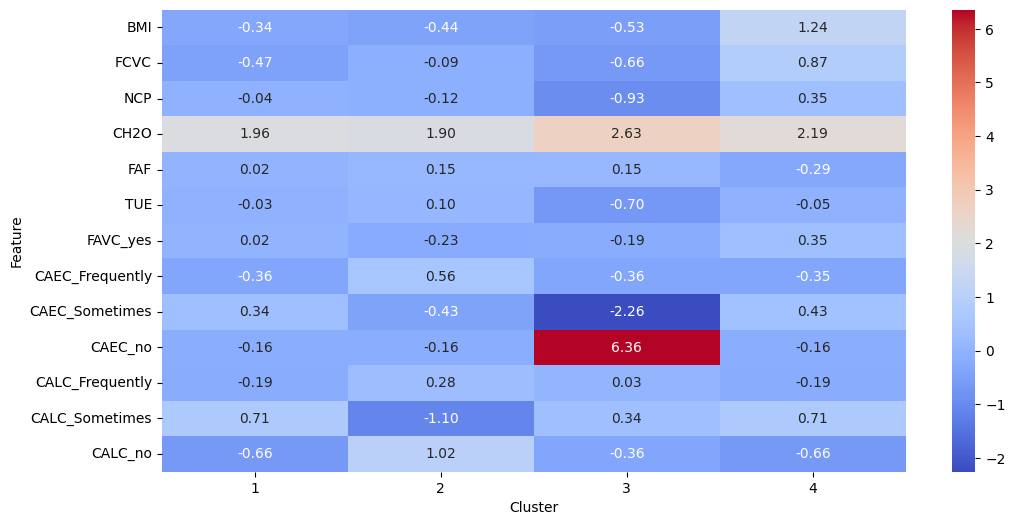

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap with updated cluster labels
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_means.T, cmap="coolwarm", annot=True, fmt=".2f")
plt.xlabel("Cluster")
plt.ylabel("Feature")
plt.show()


## Hierarchical Clustering

### Install Required Libraries

In [36]:
# Install required libraries if not already installed
!pip install scikit-learn scipy seaborn matplotlib pandas


### Standardise the Data

In [35]:
from sklearn.preprocessing import StandardScaler

# Scale features before clustering
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_clustering), columns=df_clustering.columns)


### Generate the Dendrogram

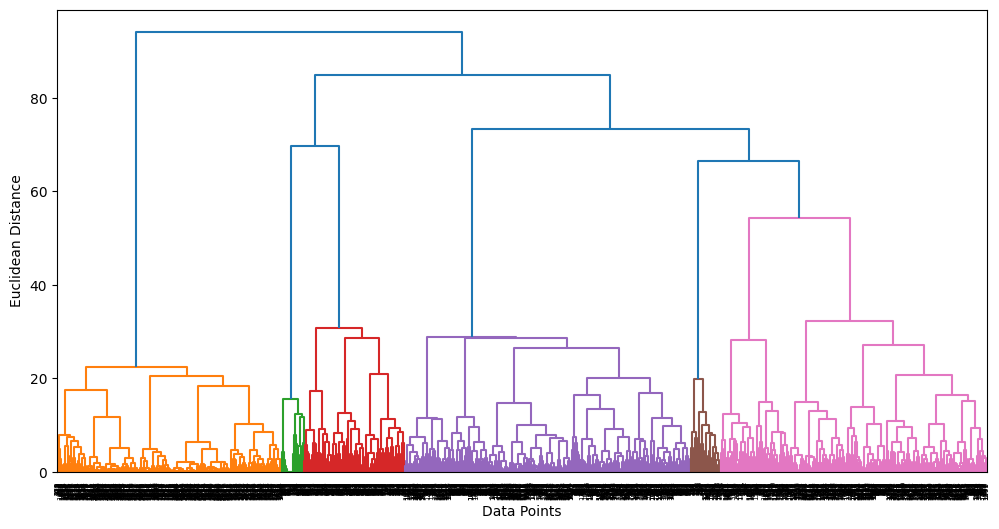

In [38]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Create the dendrogram
plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method="ward"))
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()


### Applying Hierarchical Clusting to DataFrame

In [40]:
from sklearn.cluster import AgglomerativeClustering

# Apply Hierarchical Clustering (Corrected version)
hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')

# Assign cluster labels and store them in the dataframe
df_clustering["Hierarchical_Cluster"] = hc.fit_predict(df_scaled) + 1  # Shift labels to 1-based index



### Compare Silhouette Scores for Both Clustering Methods


In [41]:
from sklearn.metrics import silhouette_score

# Compute silhouette scores for both clustering methods
hc_silhouette = silhouette_score(df_scaled, df_clustering["Hierarchical_Cluster"])
kmeans_silhouette = silhouette_score(df_scaled, df_clustering["KMeans_Cluster"])

print(f"Silhouette Score for K-Means: {kmeans_silhouette:.4f}")
print(f"Silhouette Score for Hierarchical Clustering: {hc_silhouette:.4f}")


Silhouette Score for K-Means: 0.2306
Silhouette Score for Hierarchical Clustering: 0.2384


## SHAP Analysis

### Install Necessary Packages

In [42]:
# Install SHAP and XGBoost if not already installed
!pip install shap xgboost


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 1.0/124.9 MB 2.5 MB/s eta 0:00:50
   ---------------------------------------- 1.3/124.9 MB 2.2 MB/s eta 0:00:56
   ---------------------------------------- 1.3/124.9 MB 2.2 MB/s eta 0:00:56
    --------------------------------------- 1.6/124.9 MB 1.4 MB/s eta 0:01:26
    --------------------------------------- 1.6/124.9 MB 1.4 MB/s eta 0:01:26
    --------------------------------------- 1.8/124.9 MB 1.2 MB/s eta 0:01:47
    --------------------------------------- 1.8/124.9 MB 1.2 MB/s eta 0:01:47
    --------------------------------------- 2.1/124.9 MB 1.1 MB/s eta 0:01:54
    --------------------------------------- 2.9/124.9 MB 1.3 MB/s eta 0:01:33
   - -------------------------------------- 4.2/124.9 MB 1.8 MB/s eta 0:01:08
   - --

### Import Necessary Libraries

In [43]:
import shap
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt


### Prepare Data for SHAP Analysis

In [44]:
# Define X (features) and y (cluster labels as a target)
X = df_scaled  # Features (scaled dataset)
y = df_clustering["Hierarchical_Cluster"]  # Target: Cluster assignments from Hierarchical Clustering


### Train an XGBoost Model

In [76]:
# Adjust class labels to start from 0 (XGBoost requirement)
y_adjusted = y - 1  # Shift all labels down by 1

# Train an XGBoost model with corrected labels
model = xgb.XGBClassifier(n_estimators=100, random_state=42)
model.fit(X, y_adjusted)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

### SHAP Feature Importance Scores

In [77]:
import numpy as np
import pandas as pd

# Compute mean absolute SHAP values (aggregate across classes)
feature_importance = np.abs(shap_values.values).mean(axis=(0, 2))  # Ensure 1D by averaging across classes

# Verify shape before proceeding
print(f"Final Feature Importance Shape: {feature_importance.shape}")  # Should be (14,)

# Ensure feature importance matches number of features before DataFrame creation
if len(feature_importance) == len(X.columns):
    feature_importance_df = pd.DataFrame({
        "Feature": X.columns,
        "SHAP Importance": feature_importance
    }).sort_values(by="SHAP Importance", ascending=False)

    # Display the feature importance DataFrame
    print(feature_importance_df)
else:
    print("Error: Feature importance length does not match the number of features.")


Final Feature Importance Shape: (14,)
            Feature  SHAP Importance
13   KMeans_Cluster         2.169265
11   CALC_Sometimes         0.897704
8    CAEC_Sometimes         0.795633
6          FAVC_yes         0.511106
7   CAEC_Frequently         0.301473
0               BMI         0.172383
1              FCVC         0.165862
12          CALC_no         0.075672
5               TUE         0.069367
10  CALC_Frequently         0.062352
9           CAEC_no         0.058435
4               FAF         0.054151
2               NCP         0.029620
3              CH2O         0.008720


### SHAP Summary Plot

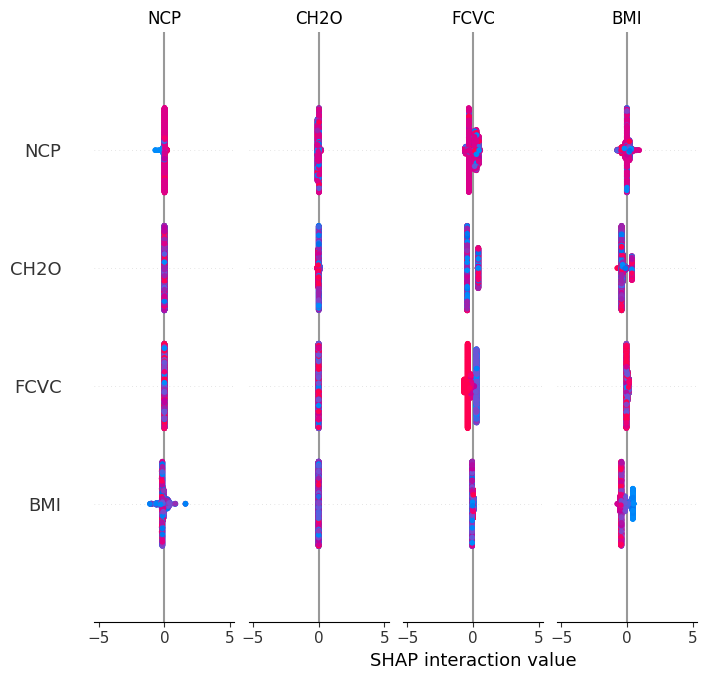

In [49]:
# Explain model predictions using SHAP
explainer = shap.Explainer(model)
shap_values = explainer(X)

# Summary plot for SHAP values (Fixed)
shap.summary_plot(shap_values, X, feature_names=X.columns)



## Dataset Cleanse For Supervised Learning

###  Reload the Data from the Original Source

In [84]:
import pandas as pd

# Reload dataset to get original values
df_original = pd.read_csv("cleaned_obesity_data.csv")

# Select only the relevant columns
df_supervised = df_original[["FAVC", "CAEC", "CALC", "BMI", "FCVC", "NObeyesdad"]].copy()



### Check the Original Unique Values

In [85]:
print("FAVC Original Unique Values:", df_supervised["FAVC"].unique())
print("CAEC Original Unique Values:", df_supervised["CAEC"].unique())
print("CALC Original Unique Values:", df_supervised["CALC"].unique())



FAVC Original Unique Values: ['no' 'yes']
CAEC Original Unique Values: ['Sometimes' 'Frequently' 'Always' 'no']
CALC Original Unique Values: ['no' 'Sometimes' 'Frequently' 'Always']


### Convert Text to Lowercase & Remove Extra Spaces

In [86]:
df_supervised["FAVC"] = df_supervised["FAVC"].astype(str).str.lower().str.strip()
df_supervised["CAEC"] = df_supervised["CAEC"].astype(str).str.lower().str.strip()
df_supervised["CALC"] = df_supervised["CALC"].astype(str).str.lower().str.strip()






### Apply Correct Mapping

In [87]:
# Define mappings
favc_mapping = {"no": 0, "yes": 1}
caec_calc_mapping = {"no": 0, "sometimes": 1, "frequently": 2, "always": 3}

# Apply mappings
df_supervised["FAVC"] = df_supervised["FAVC"].map(favc_mapping)
df_supervised["CAEC"] = df_supervised["CAEC"].map(caec_calc_mapping)
df_supervised["CALC"] = df_supervised["CALC"].map(caec_calc_mapping)



### Encoding

In [88]:
print("FAVC Encoded:", df_supervised["FAVC"].unique())
print("CAEC Encoded:", df_supervised["CAEC"].unique())
print("CALC Encoded:", df_supervised["CALC"].unique())



FAVC Encoded: [0 1]
CAEC Encoded: [1 2 3 0]
CALC Encoded: [0 1 2 3]


In [89]:
# Save the processed supervised learning dataset
df_supervised.to_csv("supervised_learning_data.csv", index=False)

print("Dataset saved successfully!")


Dataset saved successfully!


In [90]:
import os
print(os.listdir())  # This should show 'supervised_learning_data.csv' in the output


['.ipynb_checkpoints', 'cleaned_obesity_data.csv', 'cs818_env', 'ObesityDataSet_raw_and_data_sinthetic.csv', 'Summary Statistics.ipynb', 'supervised_learning_data.csv', 'Unsupervised Learning.ipynb', 'Untitled.ipynb']
